---

### Help guide

Suppose we want to plot the function $f(x)=x^2+2$ in the interval $x\in[0,1]$.
The following code should do it:

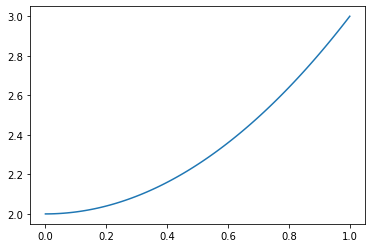

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(0,1,100)
plt.plot(x,x**2+2)
plt.show()

Suppose now that you want to plot the same curve as before, but making a scatter plot **of two lists**. This code should do it


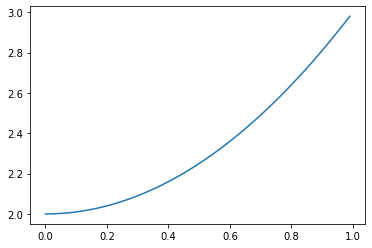

In [5]:

x = [0.01*k for k in range(0,100)] # list 1 (the x values): 100 points between 0 and 0.99, with a space of 0.01
y = [k**2+2 for k in x] # list 2 (the y values): for each point in x, this list builds x^2+2

plt.plot(x,y) # y vs x
plt.show()


---

# 1. Plotting Taylor series approximants

Let us remind Assignment 1 about Taylor series:

 The Taylor Series of $\exp x$ is given by 
$$\exp x=\sum_{k=0}^\infty\frac{x^k}{k!}\;.$$

#### 1.1 Plot in a figure the degree 3, 5 and 8 approximations (truncation) to the exponential function, together with the actual function, in the interval $x\in [0.1,5]$. Add a legend to the plot.

What can you say about the convergence of the Taylor series?



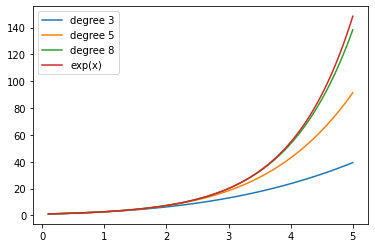

In [20]:
def taylor_series_expx_calculator(x, k):
    sum = 1
    product = 1
    for i in range(1, k+1):
        product = product*i
        sum = sum + (x**i)/product
    return sum
    
x = np.linspace(0.1,5,100)
plt.plot(x, taylor_series_expx_calculator(x, 3))
plt.plot(x, taylor_series_expx_calculator(x, 5))
plt.plot(x, taylor_series_expx_calculator(x, 8))
y = [math.exp(item) for item in x]
plt.plot(x, y)
plt.legend(["degree 3", "degree 5", "degree 8", "exp(x)"], loc = "upper left")
plt.show()

#### 1.2 In order to better appreciate the convergence, plot the difference between the the actual functiona and the approximation, for the three approximants, vs x. Can you spot a pattern? Make the plot in double-logarithmic axis. Can you make a conjecture?

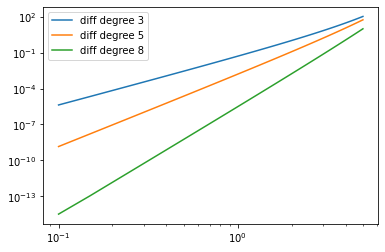

In [39]:
x = np.linspace(0.1,5,100)
diff_degree_3 = [math.exp(item) - taylor_series_expx_calculator(item, 3) for item in x]
diff_degree_5 = [math.exp(item) - taylor_series_expx_calculator(item, 5) for item in x]
diff_degree_8 = [math.exp(item) - taylor_series_expx_calculator(item, 8) for item in x]

plt.loglog(x, diff_degree_3)
plt.loglog(x, diff_degree_5)
plt.loglog(x, diff_degree_8)

plt.legend(["diff degree 3", "diff degree 5", "diff degree 8"], loc = "upper left")

plt.show()



### Conjecture

We can conjecture that firstly, as the degree of the Taylor Series polynomial increases, the accuracy of the approximation also increases. Moreover, the difference in the level of accuracy provided by the different polynomials is negligible for small values of x, and becomes quite large for values of x>1.

#### 1.3 Using lists and list comprehension, plot a graph which gives the (absolute) deviation of the $k$-th Taylor approximant to $\exp(1.5)$ as a function of $k$, for k=2,...,20. 

Try to come up with a conjecture on how quick is the convergence.

<function matplotlib.pyplot.show(close=None, block=None)>

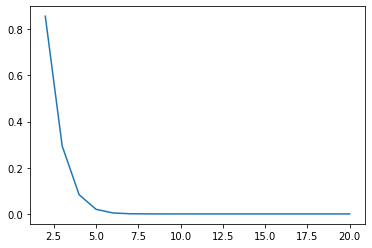

In [38]:
k = [item for item in range(2, 21)]
absolute_deviations = [abs(math.exp(1.5) - taylor_series_expx_calculator(1.5, item)) for item in k]

plt.plot(k, absolute_deviations)
plt.show

### Conjecture

We conjecture that the absolute deviations decrease exponentially as the degree of the Taylor Series Polynomial, k, increases 


# 2: Compute and plot the Riemann Zeta Function

From Assignment 1, The [Riemann zeta function](http://en.wikipedia.org/wiki/Riemann_zeta_function) is given by the infinite series
$$\zeta(s)=\sum_{n=1}^\infty\frac1{n^s}\;.$$
$\zeta(s)$ also can be expressed as an infinite product over all primes,
$$\zeta(s)=\prod_p\left(\frac1{1-p^{-s}}\right)\;,$$
where the product is over the primes $p=2,3,5,7,11,13,\ldots$.

Below we print the $6$th partial sum and the $6$th partial product for $s=2$ and $s=4$ (i.e. truncate the infinite sum or product after six terms) and compare to the exact values
$$\zeta(2)=\frac{\pi^2}6\;,\;\zeta(4)=\frac{\pi^4}{90}\;.$$

In [39]:
s=2
print(1+1/2**s+1/3**s+1/4**s+1/5**s+1/6**s)
print((1/(1-2**(-s)))*(1/(1-3**(-s)))*(1/(1-5**(-s)))*(1/(1-7**(-s)))*(1/(1-11**(-s)))*(1/(1-13**(-s))))
print(math.pi**2/6)

print()

s=4
print(1+1/2**s+1/3**s+1/4**s+1/5**s+1/6**s)
print((1/(1-2**(-s)))*(1/(1-3**(-s)))*(1/(1-5**(-s)))*(1/(1-7**(-s)))*(1/(1-11**(-s)))*(1/(1-13**(-s))))
print(math.pi**4/90)

1.4913888888888889
1.6179176613136572
1.6449340668482264

1.0811235339506173
1.0822933039823095
1.082323233711138


#### 2.1 Using the infinite product expression of the Riemann zeta function, plot the partial products with $4$, $5$, and $6$ factors as a function of $s$,for $s\in[1,5]$. Add to the plot the plot of the Riemann zeta function itself. 

Note: The Riemann zeta function is pre-coded (and thus is a function that can be imported) from the module `scipy`. I suggest using the code

`import scipy.special
zeta=scipy.special.zeta`

For the plot, I suggest a $y$-range of $[1,5]$

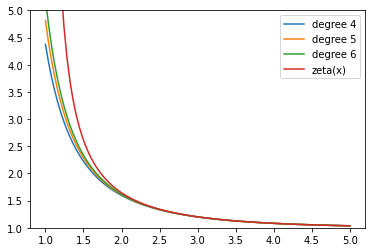

In [95]:
import scipy.special

zeta=scipy.special.zeta
x = np.linspace(1,5,100)
def riemann_zeta_fn_product(s, n):
    if n > 6 or n < 1:
        return None
    primes = [2, 3, 5, 7, 11, 13]
    product = 1
    for i in range(1, n+1):
        product = product * 1/(1-((primes[i-1])**(-s)))
    return product

plt.plot(x, riemann_zeta_fn_product(x, 4))
plt.plot(x, riemann_zeta_fn_product(x, 5))
plt.plot(x, riemann_zeta_fn_product(x, 6))
y = [zeta(item) for item in x]
plt.plot(x, y)
plt.legend(["degree 4", "degree 5", "degree 6", "zeta(x)"], loc = "upper right")
plt.ylim(1, 5)
plt.show()

# 3. Exercises on lists




## 3.1 Printing some lists

Using lists, print the following:

- the first 50 values of the sequence with general term $a_n = 2n+1$

- the first 100 prime numbers

- the first 100 even numbers

- a list with the letters of your full name (for this case, you need to define a string variable with your full name, and then use list comprehension to build a list whose elements are the letters of your name)



In [77]:
from sympy import sieve

sequence_1 = [2*item + 1 for item in range(1, 51)]
print("First 50 values of the sequence with general term 2n + 1 : " + str(sequence_1))

sieve._reset()
sieve.extend_to_no(100)
sequence_2 = list(sieve._list[:100])
print("\nFirst 100 prime numbers : " + str(sequence_2))

sequence_3 = [2*i for i in range(1, 101)]
print("\nFirst 100 even numbers : " + str(sequence_3))

name = "Agam Kapur"
sequence_4 = [item for item in name]
print("\nA list with the letters of my full name : " + str(sequence_4))

First 50 values of the sequence with general term 2n + 1 : [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101]

First 100 prime numbers : [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]

First 100 even numbers : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 

## 3.2 Printing some sums

Using lists and the technique of list comprehension, print the following:

- the sum of the first 100 prime numbers

- the sum of the first 100 even numbers

- the sum of the first 100 terms of the sequence with general term $a_n=1/2^n$, starting with $n=0$

- $\sum_{k=1}^{100} k$

- $\sum_{i=1}^{10} \sum_{j=1}^i ij$



In [96]:
sum_first_100_primes = 0

for item in sequence_2:
    sum_first_100_primes += item
print("Sum of first 100 primes = " + str(sum_first_100_primes))

sum_first_100_even = 0
for item in [2*i for i in range(1, 101)]:
    sum_first_100_even += item
print("Sum of first 100 even numbers = " + str(sum_first_100_even))

sum_of_first_100_terms = 0
for item in [1/(2**i) for i in range(0, 100)]:
    sum_of_first_100_terms += item
print("Sum of first 100 terms of sequence 1/2^n = " + str(sum_of_first_100_terms))

sum_k = 0
for item in [i for i in range(1, 101)]:
    sum_k += item
print("Sum of k = " + str(sum_k))

sum_ij = 0

print("Sum ij = " + str(sum([sum([i*j for j in range(1, i+1)]) for i in range(1, 11)])))

Sum of first 100 primes = 24133
Sum of first 100 even numbers = 10100
Sum of first 100 terms of sequence 1/2^n = 2.0
Sum of k = 5050
Sum ij = 1705


- Generate a list of the first $n$ numbers of the form $3k(k+1)+1$ for $n=15$ and $n=20$.

- Generate a list that contains the sum of the above lists of length $n$ with $n$ ranging from $0$ to $19$.

- Guess an explicit formula for the list above, and use this to generate this list directly.

## 3.3 Nested lists

What is the output is a list whose entries are themselves lists...? For example:

In [1]:
print([sum([3*k*(k+1)+1 for k in range(n)]) for n in range(5)])
print([    [3*k*(k+1)+1 for k in range(n)]  for n in range(5)])

[0, 1, 8, 27, 64]
[[], [1], [1, 7], [1, 7, 19], [1, 7, 19, 37]]


**Make sure you really understand the above code** (for example, why in the second print statement the first list entry is given by `[]`). 

It might help to pull the code apart a bit more. The code `[3*k*(k+1)+1 for k in range(n)]` gets computed five times, for values of $n$ from $0$ to 4:

In [2]:
print([3*k*(k+1)+1 for k in range(0)])
print([3*k*(k+1)+1 for k in range(1)])
print([3*k*(k+1)+1 for k in range(2)])
print([3*k*(k+1)+1 for k in range(3)])
print([3*k*(k+1)+1 for k in range(4)])

[]
[1]
[1, 7]
[1, 7, 19]
[1, 7, 19, 37]


#### Exercise 3.3.a: Using list comprehension, create 
$$[[0, 0], [1, 1], [2, 4], [3, 9], [4, 16], [5, 25], [6, 36], [7, 49]]\;,$$ 
$$[[0], [0, 1], [0,1,2], [0,1,2,3], [0,1,2,3,4]]\;,$$
$$[[1], [1, 2], [1,2,3], [1,2,3,4], [1,2,3,4,5], [1,2,3,4,5,6]]\;.$$

**Hint:** if you don't immediately see the patterns, try first using pen and paper to write down some ideas and test them.

## 3.4. More lists of lists 

Do the following:
- using list comprehension, create a list called $T$ with the first 100 odd numbers

- using list comprehension, create a list called $Z$ with the squares of the elements of $T$

- print $Z$

# 4. Dictionaries

Consider the following function, that maps nucleotide letters into numbers

$$A \mapsto -2; \ C \mapsto -1; \ G \mapsto 1; \ T \mapsto 2\;.$$

Implement this mapping between letters and numbers in a **dictionary**. Using this dictionary, print the mapping of the list [A,T,T,A,C,G].

